# Analyzing COVID-19 in the United States and Its Impact

Throughout the final unit we have explored COVID-19 and its spread throughout the world. 

The visualizations in this notebook will focus on and explore its impact on the United States.

In [56]:
#Import all libraries you may need in this cell:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go

## 1 - Finding the COVID-19 numbers per state.

In [57]:
#3 lists of data compiled for your convenience

#Georgia is number 10 so index 9
#List of states sorted in alphabetical order.
statesList = ["Alabama","Alaska","Arizona","Arkansas","California","Colorado",
  "Connecticut","Delaware","Florida","Georgia","Hawaii","Idaho","Illinois",
  "Indiana","Iowa","Kansas","Kentucky","Louisiana","Maine","Maryland",
  "Massachusetts","Michigan","Minnesota","Mississippi","Missouri","Montana",
  "Nebraska","Nevada","New Hampshire","New Jersey","New Mexico","New York",
  "North Carolina","North Dakota","Ohio","Oklahoma","Oregon","Pennsylvania",
  "Rhode Island","South Carolina","South Dakota","Tennessee","Texas","Utah",
  "Vermont","Virginia","Washington","West Virginia","Wisconsin","Wyoming"]

#Corresponding latitudes for each state.
latitudes = [32.361538, 58.301935, 33.448457, 34.736009, 38.555605, 39.7391667, 41.767, 39.161921, 30.4518, 33.76,
            21.30895, 43.613739, 39.783250, 39.790942, 41.590939, 39.04, 38.197274, 30.45809, 44.323535, 38.972945,
            42.2352, 42.7335, 44.95,32.320, 38.572954,46.595805,40.809868,39.160949,43.220093, 40.221741,35.667231,
            42.659829,35.771, 48.813343,39.962245, 35.482309,44.931109, 40.269789, 41.82355, 34.000,  44.367966,36.165,
            30.266667,40.7547,44.26639, 37.54, 47.042418,38.349497,43.074722, 41.145548]

#Corresponding longitudes for each state.
longitudes = [-86.279118,-134.419740,-112.073844, -92.331122,-121.468926 ,-104.984167 ,-72.677 , -75.526755 ,
              -84.27277,-84.39,-157.826182 ,-116.237651 ,-89.650373 ,-86.147685 ,-93.620866 ,-95.69 , -84.86311
              ,-91.140229 ,-69.765261 ,-76.501157 ,-71.0275 ,-84.5467 , -93.094 ,-90.207 , -92.189283
              , -112.027031 ,-96.675345 ,-119.753877 ,-71.549127 , -74.756138, -105.964575 , -73.781339 ,-78.638 
              ,-100.779004 ,-83.000647 , -97.534994,-123.029159 ,-76.875613 , -71.422132, -81.035, -100.336378
              ,-86.784 ,-97.75 ,-111.892622 ,-72.57194 ,-77.46 ,-122.893077 ,-81.633294 ,-89.384444 ,-104.802042]


Use the New York Times' COVID-19 data(https://github.com/nytimes/covid-19-data/blob/master/us-states.csv) to create **two functions** that takes the name of a state as input and returns the bar plots of 1) # of cases over time and 2) # of deaths over time for that specific state.

In [58]:
df = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv")
df.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [59]:
print(str(latitudes[9]) + ", " + str(longitudes[9]))

33.76, -84.39


In [60]:
new_df = df.loc[df["state"] == "Illinois"]
new_df.head()
new_df.tail()

,date,state,fips,cases,deaths
5088,2020-06-03,Illinois,17,124279,5665
5143,2020-06-04,Illinois,17,125149,5772
5198,2020-06-05,Illinois,17,126317,5834
5253,2020-06-06,Illinois,17,127251,5898
5308,2020-06-07,Illinois,17,128070,5939


In [78]:
def stateCOVID(state):
    new_df = df.loc[df["state"] == state]
    fig = plt.figure()
    ax = fig.add_axes([ 0, 0, 3, 2]) #[starting point on x axis, on y axis, length, width]        
    dates = df["date"]
    numCases = df["cases"]
    plt.plot(dates, numCases)
    ax.bar(dates, numCases)
    plt.title("Cases of COVID-19 in" + state)
    plt.xlabel("Date")
    plt.ylabel("Cases")
    ax.xaxis.set_major_locator(plt.MaxNLocator(5))
    plt.show

    fig2 = plt.figure()
    ax2 = fig2.add_axes([ 0, 0, 3, 2]) 
    dates2 = df["date"]
    numDeaths = df["deaths"]
    plt.plot(dates2, numDeaths)
    ax.bar(dates2, numDeaths)
    plt.title("Deaths from COVID-19 in" + state)
    plt.xlabel("Date")
    plt.ylabel("Deaths")
    ax2.xaxis.set_major_locator(plt.MaxNLocator(5))
    plt.show

Call the functions on your assigned state to visualize the data.

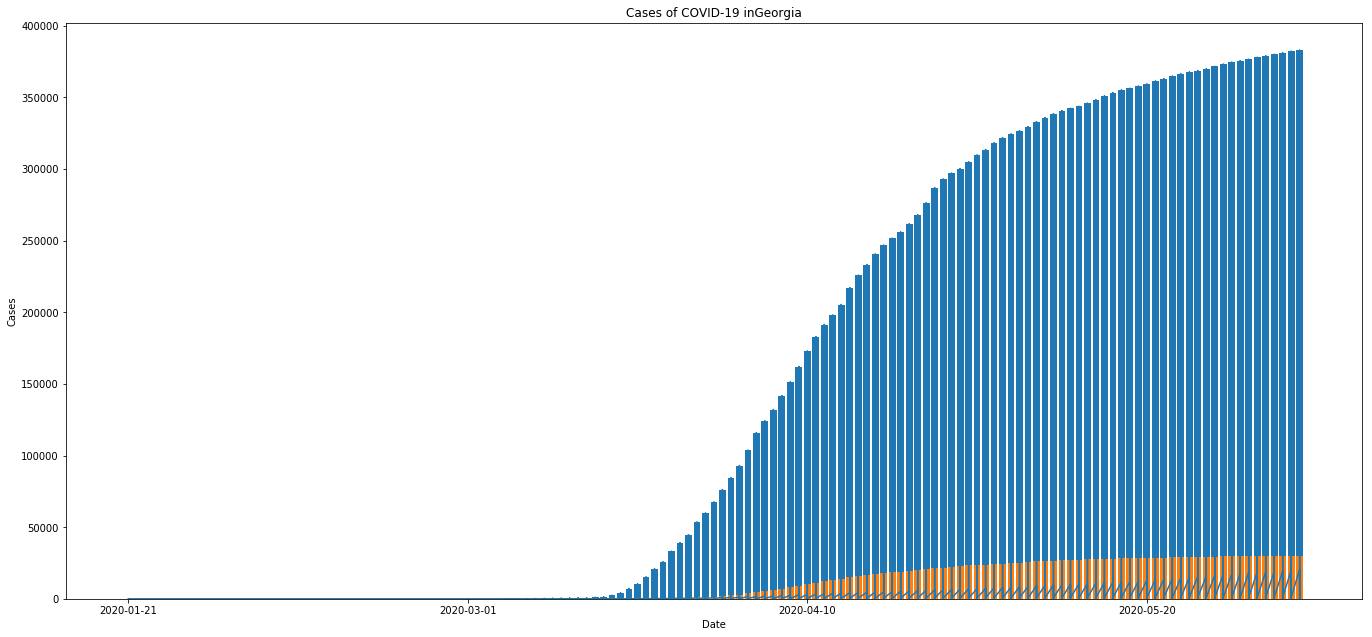

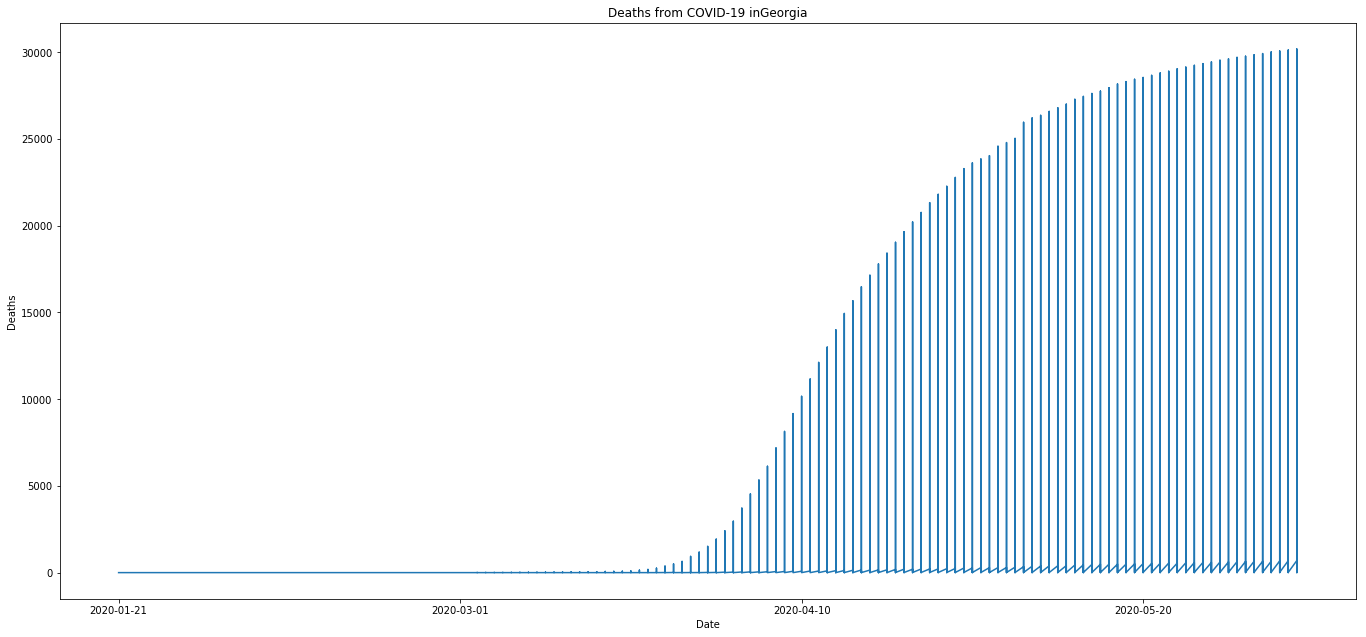

In [79]:
stateCOVID("Georgia")

Use New York Times' COVID-19 data(https://github.com/nytimes/covid-19-data/blob/master/us-states.csv) to create a geographical scatterplot and choropleth map of the United States based on its numbers of COVID-19 cases and deaths. (Use colors that you think are appropriate).

In [65]:
df2 = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv")
df2.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [76]:
def dfFormatter(df,selectColumn):

    df2_formatted = pd.DataFrame(statesList, columns = ["state"])
    df2_formatted["lat"] = latitudes
    df2_formatted["long"] = longitudes

    previousDate = "2020-01-01"
    for i in range(len(df["date"])):
        if (df["date"])[i] != previousDate:
            df2_formatted[(df["date"])[i]] = 0
        
    df2_formatted.set_index("state", inplace = True)  
    if selectColumn == "cases":
        for i in range(len(df["state"])):
            df2_formatted.loc[df["state"][i], df["date"][i]] = df["cases"][i]
    
    df2_formatted.reset_index(inplace = True)  
    df2_formatted.drop([50,51,52,53,54], inplace = True)
    return df2_formatted

df_cases = dfFormatter(df, "cases")
df_cases

,state,lat,long,2020-01-21,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,...,2020-05-29,2020-05-30,2020-05-31,2020-06-01,2020-06-02,2020-06-03,2020-06-04,2020-06-05,2020-06-06,2020-06-07
0,Alabama,32.361538,-86.279118,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,17031.0,17359.0,17952.0,18534.0,18771.0,18851.0,19072.0,19387.0,20043.0,20500.0
1,Alaska,58.301935,-134.419740,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,436.0,441.0,469.0,476.0,497.0,516.0,542.0,565.0,579.0,588.0
2,Arizona,33.448457,-112.073844,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,18465.0,19255.0,19936.0,20123.0,21250.0,22245.0,22818.0,24369.0,25517.0,26924.0
3,Arkansas,34.736009,-92.331122,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6777.0,7013.0,7253.0,7443.0,7818.0,8067.0,8425.0,8651.0,9101.0,9426.0
4,California,38.555605,-121.468926,0.0,0.0,0.0,0.0,1.0,2.0,2.0,...,107043.0,110100.0,113114.0,115643.0,118081.0,120407.0,122917.0,126510.0,129147.0,131997.0
5,Colorado,39.739167,-104.984167,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,25602.0,26084.0,26364.0,26563.0,26774.0,27046.0,27346.0,27601.0,27834.0,27987.0
6,Connecticut,41.767000,-72.677000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,41762.0,42022.0,42201.0,42740.0,42979.0,43091.0,43239.0,43460.0,43818.0,43968.0
7,Delaware,39.161921,-75.526755,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9236.0,9422.0,9498.0,9605.0,9685.0,9712.0,9746.0,9773.0,9845.0,9942.0
8,Florida,30.451800,-84.272770,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,54489.0,55416.0,56155.0,56822.0,57439.0,58756.0,60175.0,61480.0,62750.0,63930.0
9,Georgia,33.760000,-84.390000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,43888.0,44336.0,45051.0,45757.0,46063.0,46711.0,47528.0,48280.0,48943.0,49371.0


In [46]:
colors = ["#FF4D00", "#FF6400", "#FF7800", "#FF8B00",  "#FF9E00", "#FFAE00", "#FFD800",
          "#FFE800 ", "#FFF700", "#E8FF00", "#D8FF00",  "#C1FF00", "#B2FF00", "#8BFF00",
          "#2EFF00", "#1BFF00", "#17FF00", "#0CFF00",  "#00FF0C", "#00FF2A", "#00FF3E"]

fig = go.Figure(data = go.Choropleth(
    locationmode = "USA-states", #Identifying data based on countries
    locations = df2["state"], #Locations of the data
    z = df_cases, #Data that you are mesuring
    text = df2["cases"], #Data displayed on hover
    colorscale = colors, #List of colors in hex
    autocolorscale = False,
    reversescale = False,
    colorbar_title = "Reported COVID-19 Cases"
))

fig.update_layout(
    title_text = "Reported COVID-19 Cases In the US",
    geo_scope = "usa", 
)
fig.show()

## 2 - Analyzing Its Impact on the United States

Group 5 -

The cancellation of public events and gatherings have impacted the world's work-life balance in ways never seen before. Using the following dataset from Oxford University(https://github.com/OxCGRT/covid-policy-tracker/blob/master/data/timeseries/c4_restrictionsongatherings.csv), create a choropleth map of the # of gathering restrictions imposed in each country.

## 3 - Challenge (optional): Find a dataset online that explores other ways that COVID-19 has impacted the United States and use pandas and Plotly to create a visualization based on it.

Some ideas:
* number of business closures in each state over time
* number of people telecommuting in the US
* number of hospitalizations in each state

etc..